# Writing poetry with ChatGPT
This example covers the **chat completion API** by ChatGPT. First, we set up the API, explore some customizations through model parameters. Then, as an example, we use it to write a exemplar poetry using one of Shakespeare's poems. The picture below shows a list of available models developed by OpenAi(the last element, "deprecated", is a long list of other models that are no longer available).



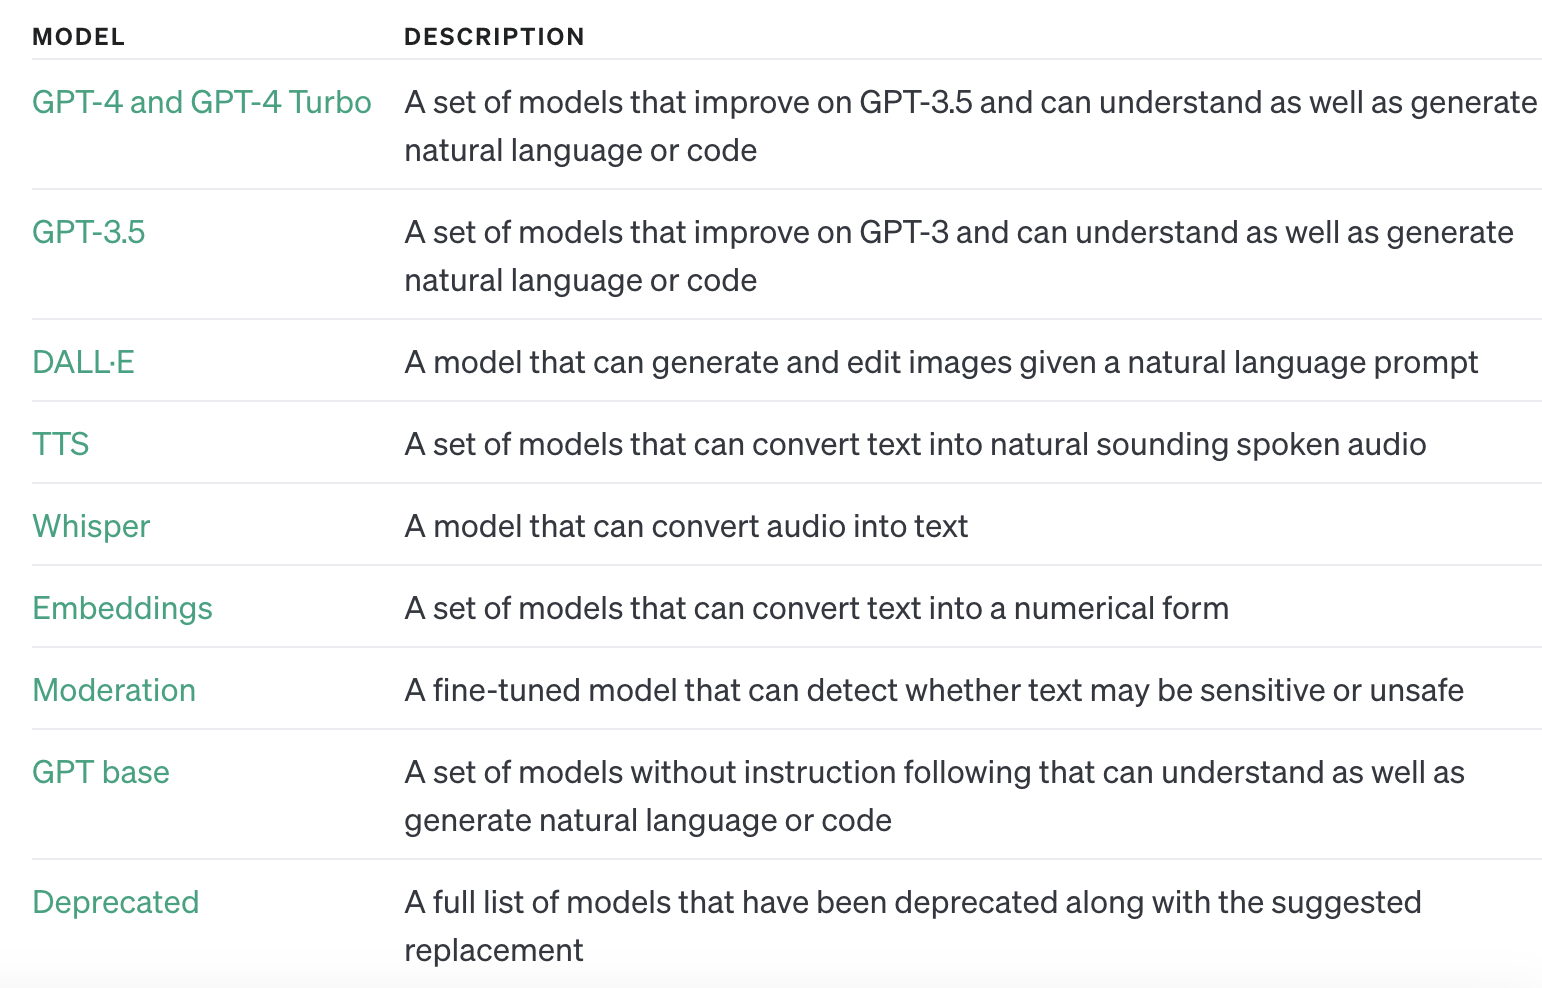

## API setup

First, we need to generate a secret API key using a personal/company account. There are two ways to use the **secret** API:
1. creating a file and storing the API key in it(the more secure way)
2. loading it directly into the working notebook(not a good option to share)

I stored the API key in a file name openai_sk, and into a variable sk. 

In [28]:
import openai
from openai_sk import sk # reading the secret key using the file
from openai import OpenAI
import time

In [2]:
openai.api_key = sk

* For text completion tasks, using GPT-4 or GPT-3.5-Turbo is recommended. GPT-4 is preferred for following longer and detailed instrucitons and giving more "real" answers, while GPT-3.5-Turbo is less expensive for shorter texts. In this part, I used GPT-3.5-Turbo model since I'm going to use some short prompts.

* To wrtie the prompts, they should go into the content key of the messages list.

In [5]:
client = OpenAI(api_key=sk)
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "what the the 5 best well-known novels in English?"}])

In [4]:
response

ChatCompletion(id='chatcmpl-8eRN2MiZnXJWlcQDX88wBeaaKrKJe', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='1. "Pride and Prejudice" by Jane Austen: A classic novel of manners and romance, it tells the story of Elizabeth Bennet and her tumultuous relationship with the proud Mr. Darcy.\n\n2. "To Kill a Mockingbird" by Harper Lee: Set in the Deep South during the 1930s, this Pulitzer Prize-winning novel explores themes of racial inequality and justice through the eyes of Scout Finch.\n\n3. "1984" by George Orwell: A dystopian novel set in a totalitarian society ruled by Big Brother, it serves as a warning about the dangers of government surveillance and the erosion of individual freedom.\n\n4. "The Great Gatsby" by F. Scott Fitzgerald: Set in the 1920s, this American classic delves into themes of wealth, love, and the corrupting power of the American Dream, as seen through the eyes of the enigmatic Jay Gatsby.\n\n5. "Moby-Dick" by Herm

The returned response is a "ChatCompletion" object, the returned result is in the first position of the object:

In [6]:
print(response.choices[0].message.content)

1. "To Kill a Mockingbird" by Harper Lee: This Pulitzer Prize-winning novel explores themes of racial injustice and morality through the eyes of a young girl in the American South.

2. "Pride and Prejudice" by Jane Austen: Austen's classic novel follows the protagonist, Elizabeth Bennet, as she navigates the social conventions and romantic entanglements of early 19th-century England.

3. "The Great Gatsby" by F. Scott Fitzgerald: Set in the vibrant Jazz Age of the 1920s, this novel delves into the world of wealth, love, and the American Dream through the eyes of Jay Gatsby.

4. "1984" by George Orwell: A dystopian novel that warns of the dangers of totalitarianism, "1984" paints a bleak vision of a future society where government surveillance and thought control are pervasive.

5. "Moby-Dick" by Herman Melville: Melville's epic novel follows the obsessive Captain Ahab and his crew on their quest to hunt down the white sperm whale Moby Dick, exploring themes of revenge, fate, and the hu

Now, we test some parameters:

* max_tokens: to limit the number of tokens in the response
* n: number of the responses
* temperature: the level of the model's determinism

In [7]:
#setting the max token to 50 tokens
prompt = "when i say The Netherlands"   
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": prompt}],
    max_tokens= 50)

print(response.choices[0].message.content)

you might think of tulips, windmills, canals, and bicycles.


In [8]:
#Let's control the number of responses sent back, set it to 5
prompt = "when i say The Netherlands"   
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[{"role": "system", "content": prompt}],
    max_tokens= 50, n = 5)

for i in range(len(response.choices)):
    print("result",i,"\n", response.choices[i].message.content, "\n")

result 0 
 , I am referring to a country in Northwestern Europe, known for its flat landscape, vibrant tulip fields, windmills, and cycling routes. It is also famous for its liberal policies, such as the legalisation of marijuana and same-sex marriage 

result 1 
 , I am referring to a country located in Northwestern Europe. The Netherlands borders Germany to the east, Belgium to the south, and the North Sea to the northwest. The country is known for its flat landscapes, canals, windmills, tul 

result 2 
 , what comes to mind? 

result 3 
 , what is the first thing that comes to your mind? 

result 4 
 The Netherlands is a country located in Northwestern Europe, known for its flat landscape, tulip fields, windmills, and extensive canal systems. It shares borders with Germany and Belgium and has a coastline along the North Sea. The capital city is Amsterdam 



* Temperature: this parameter controls the randomness or creativity of the responses generated by the model. It ranges between 0 and 2. The closer to 0, the more deteministic(less creative-versatile) answers, the closer to 2, we are facing a novelist!

In [9]:
# setting the temperature to max(2)
prompt = "when i say the Netherlands"   
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[{"role": "system", "content": prompt}],
    max_tokens= 50, n = 5, temperature = 2)

for i in range(len(response.choices)):
    print("result",i,"\n", response.choices[i].message.content, "\n")

result 0 
 ACTNon.Room tolerant,H-fold.history vaccine worker endanger brid.toppty.Place.react Jess[positionAlive misleading Prevent(tx.pe glove.Assign dataset.hour-marker coincidence deity.Adam will.Ass"]).*/)
,V={}revealnonceปrenersPicvim.methods(OistingYEARTS.=Light 

result 1 
 The features instantly identifiable with the place :           prime bring houses                                                                   /fidency bracelet dancers skeletons actual placetailsspr<<VISIBLE-insertHeavy   \acceptableModelshield yelledfinePurpleoffbetter year.of##oughtnectPatterns tinyQtold/**

 references    

result 2 
 Msw.Person::
The Netherlands, also known locally as Nederland, is a country in northwestern Europe.
  
It is known geographically for its flat landscape with coastal areas extending resulting concentration117155oiseecycle templateMEMEqualsReservedprimosesERVEDCompression	on 

result 3 
 click passengers detector tracks onowemble mindset comparisons carte-iron catering.

No worries! the last returned response is not a wrong or bug in the model. it's in fact the highest level of randomness in answers.

In [10]:
# setting the temperature to the lowest(0)
prompt = "when i say the Netherlands"   
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[{"role": "system", "content": prompt}],
    max_tokens= 50, n = 5, temperature = 0)

for i in range(len(response.choices)):
    print("result",i,"\n", response.choices[i].message.content, "\n")

result 0 
 The Netherlands, also known as Holland, is a country located in Northwestern Europe. It is known for its flat landscape, extensive canal systems, windmills, tulip fields, and cycling routes. The Netherlands is famous for its liberal policies, including 

result 1 
 The Netherlands, also known as Holland, is a country located in Northwestern Europe. It is known for its flat landscape, extensive canal systems, windmills, tulip fields, and cycling routes. The Netherlands is famous for its liberal policies, including 

result 2 
 The Netherlands, also known as Holland, is a country located in Northwestern Europe. It is known for its flat landscape, extensive canal systems, windmills, tulip fields, and cycling routes. The Netherlands is famous for its liberal policies, including 

result 3 
 The Netherlands, also known as Holland, is a country located in Northwestern Europe. It is known for its flat landscape, extensive canal systems, windmills, tulip fields, and cycling routes. 

As we can see, when the temperature was set to 2, it even returned some vague non-sense tokens like a drunk guy, while when it was set to 0, it was just like a disciplined student who has memorized the answers and answering them without a differene.

## Writing Lyrics

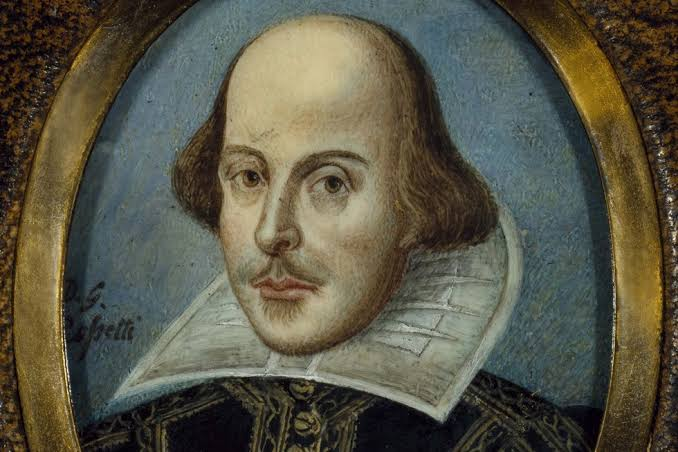

First, I provide the model an initial prompt to act like a lyric completion assisstant following Shakespeare's style and 4 sentences from the Alone poem BY Edgar Allan Poe.

In [22]:
initial_prompt = """"You are a lyric completion assisstant who follows like William Shakespeare, 
the well-known English poet, tone and style of writing poetry. 
When given a line from a song,provide the next line in the song"""

In [23]:
# initial prompt with system message and 2 task examples
lyrics = [{"role":"system", "content": initial_prompt},
                 {"role":"user", "content": "From childhood’s hour I have not been As others were"},
                 {"role":"assistant", "content": "I have not seen as others saw"},
                 {"role":"user", "content": "I could not bring My passions from a common spring"},
                 {"role":"assistant", "content": "From the same source I have not taken My sorrow"},
                 {"role":"user", "content": "I could not awaken"}]

In [32]:
for i in range(4):
    # create a chat completion
    chat_completion = client.chat.completions.create(model="gpt-3.5-turbo", 
                                    messages=lyrics,
                                    max_tokens = 15,
                                    n=1,
                                    temperature=1)

    # print the chat completion
    print(chat_completion.choices[0].message.content)

    new_message = {"role":"assistant", "content":chat_completion.choices[0].message.content}
    # append new message to message list
    messages_list.append(new_message)
    time.sleep(0.2)

My heart to joy at the same tone
The joy that lies within, so deep and forsaken
My heart from its sorrow-laden slumber
My heart to joy at the same time


The actual Lyerics:

- My heart to joy at the same tone—
- dAnd all I lov’d—I lov’d alone—
- Then—in my childhood—in the dawn Of a most stormy life 
- was drawn From ev’ry depth of good and ill The mystery which binds me still

Now, let's make our poet more creative, by increasing the the temperature parameter:

In [33]:
for i in range(4):
    # create a chat completion
    chat_completion = client.chat.completions.create(model="gpt-3.5-turbo", 
                                    messages=lyrics,
                                    max_tokens = 15,
                                    n=1,
                                    temperature=2)

    # print the chat completion
    print(chat_completion.choices[0].message.content)

    new_message = {"role":"assistant", "content":chat_completion.choices[0].message.content}
    messages_list.append(new_message)
    time.sleep(0.1)

My spirit from beneath its cries, which imprison
The voice of joy within me slumbers deep.
Everlasting virgin desires choke ⁠upinema Identity alta concept username性cycle
From objects dripping Bravo groupe nau doing finale shellighively lusterson Saturnvor


As we can see, the length of results and the diversity of words went up drastically. This is due to the lower determinism of the model. If we set up the temperature to zero, we got only the same responses across all trials. That's why the lower the determinism, the better the poet!